In [1]:
from astroquery.simbad import Simbad
from astropy.table import join
import astropy.units as u

In [2]:
host_gal_dict = {'ESO_243-49_HLX-1'             : 'ESO243-49',
                 'NAME_Holmberg_IX_X-1'         : 'Holmberg_IX',
                 'Holmberg_II_X-1'              : 'Holmberg_II',
                 'M31_ULX-1'                    : 'M31',
                 '[LM2005]_NGC_598_ULX1'        : 'M33',         # AKA M33 X-8
                 'RX_J133001+47137'             : 'M51',         # M51 ULX-7
                 '[LM2005]_NGC_3031_ULX1'       : 'M81',         # AKA M81
                 'M82_X-2'                      : 'M82',
                 '[LM2005]_NGC_1042_ULX1'       : 'NGC1042',
                 'NAME_NGC_1313_X-1'            : 'NGC1313',
                 'NAME_NGC_1313_X-2'            : 'NGC1313',
                 '[LM2005]_NGC_247_ULX1'        : 'NGC247',
                 '[LB2005]_NGC_253_X20'         : 'NGC253',       # NGC 253 ULX1
                 'NAME_NGC_300_ULX1'            : 'NGC300',
                 '[LM2005]_NGC_4395_ULX1'       : 'NGC4395',
                 '[LM2005]_NGC_5204_ULX1'       : 'NGC5204',
                 '[LM2005]_NGC_5408_ULX1'       : 'NGC5408',
                 '[SRW2006b]_NGC_55_ULX'        : 'NGC55',
                 '[SST2011]_J141939.39+564137.8': 'NGC5585',       # NGC 5585 ULX (overlapping sources)
                 'NAME_NGC_5907_ULX'            : 'NGC5907',
                 '[LB2005]_NGC_6946_ULX1'       : 'NGC6946',
                 '3XMM_J213631.9-543357'        : 'NGC7090',       # NGC 7090
                 'NAME_NGC_7793_P13'            : 'NGC7793',
                 'NAME_NGC_925_ULX-1'           : 'NGC925',
                 'NAME_NGC_925_ULX-2'           : 'NGC925',
                 'SMC_X-3'                      : 'SMC',
                 'SS433'                        : 'SS433',
                 'SWIFT_J0243.6+6124'           : 'Swift_J0243.6+6124',
                 'NAME_UGC_6456_ULX'            : 'UGC6456',
                 'NOVA_Cyg_1989'                : 'V404Cyg',       # v404 Cygni
                 '[LB2005]_NGC_5236_ULX1'       : 'M83',           # Outer ULX M83
                 'NAME_M83_ULX-1'               : 'M83',           # Inner ULX M83
                 'NAME_NGC_1365-X1'             : 'NGC1365',       # 1365 X-1
                 '[SK2009]_X2'                  : 'NGC1365',       # 1365 X-2
                 'NAME_IC_10_X-1'               : 'IC10',
                 '[WMR2006]_NGC4945_XMM1'       : 'NGC4945',
                 '[LB2005]_NGC_3031_X6'         : 'M81',
                 '[LM2005]_NGC_4559_ULX1'       : 'NGC4559'}


source_names_readable = {'ESO_243-49_HLX-1'             : 'ESO_243-49 HLX-1',
                         'NAME_Holmberg_IX_X-1'         : 'Holmberg IX X-1',
                         'Holmberg_II_X-1'              : 'Holmberg II X-1',
                         'M31_ULX-1'                    : 'M31 ULX-1',
                         '[LM2005]_NGC_598_ULX1'        : 'M33 ULX-1',         # AKA M33 X-8
                         'RX_J133001+47137'             : 'M51 ULX-7',         # M51 ULX-7
                         '[LM2005]_NGC_3031_ULX1'       : 'M81 ULX-1',         # AKA M81
                         'M82_X-2'                      : 'M82 X-2',
                         '[LM2005]_NGC_1042_ULX1'       : 'NGC1042 ULX-1',
                         'NAME_NGC_1313_X-1'            : 'NGC1313 X-1',
                         'NAME_NGC_1313_X-2'            : 'NGC1313 X-2',
                         '[LM2005]_NGC_247_ULX1'        : 'NGC247 ULX-1',
                         '[LB2005]_NGC_253_X20'         : 'NGC253 ULX-1',       # NGC 253 ULX1
                         'NAME_NGC_300_ULX1'            : 'NGC300 ULX-1',
                         '[LM2005]_NGC_4395_ULX1'       : 'NGC4395 ULX-1',
                         '[LM2005]_NGC_5204_ULX1'       : 'NGC5204 ULX-1',
                         '[LM2005]_NGC_5408_ULX1'       : 'NGC5408 ULX-1',
                         '[SRW2006b]_NGC_55_ULX'        : 'NGC55 ULX',
                         '[SST2011]_J141939.39+564137.8': 'NGC5585 ULX',       # NGC 5585 ULX (overlapping sources)
                         'NAME_NGC_5907_ULX'            : 'NGC5907 ULX',
                         '[LB2005]_NGC_6946_ULX1'       : 'NGC6946 ULX-1',
                         '3XMM_J213631.9-543357'        : 'NGC7090 ULX-3',       # NGC 7090
                         'NAME_NGC_7793_P13'            : 'NGC7793 P13',
                         'NAME_NGC_925_ULX-1'           : 'NGC925 ULX-1',
                         'NAME_NGC_925_ULX-2'           : 'NGC925 ULX-2',
                         'SMC_X-3'                      : 'SMC X-3',
                         'SS433'                        : 'SS433',
                         'SWIFT_J0243.6+6124'           : 'Swift_J0243.6+6124',
                         'NAME_UGC_6456_ULX'            : 'UGC6456 ULX',
                         'NOVA_Cyg_1989'                : 'V404Cyg',       # v404 Cygni
                         '[LB2005]_NGC_5236_ULX1'       : 'M83 ULX-2',           # Outer ULX M83
                         'NAME_M83_ULX-1'               : 'M83 ULX-1',           # Inner ULX M83
                         'NAME_NGC_1365-X1'             : 'NGC1365 X-1',       # 1365 X-1
                         '[SK2009]_X2'                  : 'NGC1365 X-2',       # 1365 X-2
                         'NAME_IC_10_X-1'               : 'IC10 X-1',
                         '[WMR2006]_NGC4945_XMM1'       : 'NGC4945 XMM-1',
                         '[LB2005]_NGC_3031_X6'         : 'M81 X-6',
                         '[LM2005]_NGC_4559_ULX1'       : 'NGC4559 ULX-1'}

In [3]:
source_names = list(host_gal_dict.keys())
gal_names = list(host_gal_dict.values())
source_names_r = list(source_names_readable.values())

In [4]:
tab1 = Simbad.query_objects(source_names)
tab1['source_name'] = source_names
tab1['source_name_readable'] = source_names_r
tab1

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,source_name,source_name_readable
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32,str29,str18
[FWB2009] HLX-1,01 10 28.30,-46 04 22.3,6,6,300.000,300.000,90,C,X,2010ApJ...712L.107W,1,ESO_243-49_HLX-1,ESO_243-49 HLX-1
RX J0957.9+6903,09 57 53.290,+69 03 48.20,7,7,54.000,49.000,0,C,O,2009ApJS..182..543A,2,NAME_Holmberg_IX_X-1,Holmberg IX X-1
[SST2011] J081929.00+704219.3,08 19 28.99,+70 42 19.4,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,3,Holmberg_II_X-1,Holmberg II X-1
CXOM31 J004253.1+411422,00 42 53.15,+41 14 22.9,6,6,--,--,0,D,X,2012A&A...538A..49K,4,M31_ULX-1,M31 ULX-1
ChASeM33 J013350.89+303936.6,01 33 50.8965,+30 39 36.630,14,14,0.283,0.238,90,A,O,2020yCat.1350....0G,5,[LM2005]_NGC_598_ULX1,M33 ULX-1
RX J133001+47137,13 30 01.01,+47 13 43.9,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,6,RX_J133001+47137,M51 ULX-7
[FK2005] 7,09 55 32.95,+69 00 33.6,6,6,1000.000,1000.000,0,D,X,2014MNRAS.442.1054H,7,[LM2005]_NGC_3031_ULX1,M81 ULX-1
[KCF2005] M82 G,09 55 51.040,+69 40 45.49,7,7,--,--,0,D,,2006ApJ...646..174K,8,M82_X-2,M82 X-2


In [5]:
Simbad.add_votable_fields('distance')

In [6]:
tab = Simbad.query_objects(gal_names)
tab['source_name'] = source_names


In [7]:
sub = tab['MAIN_ID', 'Distance_distance', 'Distance_unit', 'Distance_method', 'Distance_bibcode', 'source_name']
sub

MAIN_ID,Distance_distance,Distance_unit,Distance_method,Distance_bibcode,source_name
object,float64,str4,str8,str19,str29
ESO 243-49,115.3500,Mpc,,2016AJ....152...50T,ESO_243-49_HLX-1
UGC 5336,3.8500,Mpc,T-RDB,2017AJ....153....6K,NAME_Holmberg_IX_X-1
UGC 4305,3.4674,Mpc,redshift,2019A&A...631A..38L,Holmberg_II_X-1
M 31,0.8200,Mpc,T-RDB,2017AJ....153....6K,M31_ULX-1
M 33,0.9300,Mpc,T-RDB,2017AJ....153....6K,[LM2005]_NGC_598_ULX1
M 51,7.6000,Mpc,redshift,2011MNRAS.413..813C,RX_J133001+47137
M 81,3.5975,Mpc,redshift,2019A&A...631A..38L,[LM2005]_NGC_3031_ULX1
M 82,3.6141,Mpc,redshift,2019A&A...631A..38L,M82_X-2
NGC 1042,19.2000,Mpc,,2007ApJ...661..801O,[LM2005]_NGC_1042_ULX1


In [8]:
sub.sort('Distance_distance')
sub

MAIN_ID,Distance_distance,Distance_unit,Distance_method,Distance_bibcode,source_name
object,float64,str4,str8,str19,str29
NAME SMC,0.0600,Mpc,Cep,2017AJ....153....6K,SMC_X-3
IC 10,0.7943,Mpc,redshift,2019A&A...631A..38L,NAME_IC_10_X-1
M 31,0.8200,Mpc,T-RDB,2017AJ....153....6K,M31_ULX-1
M 33,0.9300,Mpc,T-RDB,2017AJ....153....6K,[LM2005]_NGC_598_ULX1
NGC 300,2.0230,Mpc,redshift,2019A&A...631A..38L,NAME_NGC_300_ULX1
NGC 55,2.1100,Mpc,T-RDB,2017AJ....153....6K,[SRW2006b]_NGC_55_ULX
UGC 4305,3.4674,Mpc,redshift,2019A&A...631A..38L,Holmberg_II_X-1
NGC 4945,3.4674,Mpc,redshift,2019A&A...631A..38L,[WMR2006]_NGC4945_XMM1
M 81,3.5975,Mpc,redshift,2019A&A...631A..38L,[LB2005]_NGC_3031_X6


In [9]:
tab.columns

<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE','Distance_distance','Distance_Q','Distance_unit','Distance_merr','Distance_perr','Distance_method','Distance_bibcode','SCRIPT_NUMBER_ID','source_name')>

In [10]:
tab_join = join(tab1,tab, keys='source_name')
tab_join

MAIN_ID_1,RA_1,DEC_1,RA_PREC_1,DEC_PREC_1,COO_ERR_MAJA_1,COO_ERR_MINA_1,COO_ERR_ANGLE_1,COO_QUAL_1,COO_WAVELENGTH_1,COO_BIBCODE_1,SCRIPT_NUMBER_ID_1,source_name,source_name_readable,MAIN_ID_2,RA_2,DEC_2,RA_PREC_2,DEC_PREC_2,COO_ERR_MAJA_2,COO_ERR_MINA_2,COO_ERR_ANGLE_2,COO_QUAL_2,COO_WAVELENGTH_2,COO_BIBCODE_2,Distance_distance,Distance_Q,Distance_unit,Distance_merr,Distance_perr,Distance_method,Distance_bibcode,SCRIPT_NUMBER_ID_2
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32,str29,str18,object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,str1,str4,float64,float64,str8,str19,int32
3XMM J213631.9-543357,21 36 31.94,-54 33 57.2,6,6,400.000,400.000,90,D,X,2012ApJ...756...27L,22,3XMM_J213631.9-543357,NGC7090 ULX-3,NGC 7090,21 36 28.865,-54 33 26.35,7,7,--,--,0,C,I,2006AJ....131.1163S,9.5060,,Mpc,--,--,redshift,2019A&A...631A..38L,22
[FWB2009] HLX-1,01 10 28.30,-46 04 22.3,6,6,300.000,300.000,90,C,X,2010ApJ...712L.107W,1,ESO_243-49_HLX-1,ESO_243-49 HLX-1,ESO 243-49,01 10 27.7550,-46 04 27.356,14,14,2.641,3.174,90,C,O,2020yCat.1350....0G,115.3500,,Mpc,--,--,,2016AJ....152...50T,1
[SST2011] J081929.00+704219.3,08 19 28.99,+70 42 19.4,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,3,Holmberg_II_X-1,Holmberg II X-1,UGC 4305,08 19 04.9864,+70 43 13.086,14,14,0.291,0.447,90,A,O,2020yCat.1350....0G,3.4674,,Mpc,--,--,redshift,2019A&A...631A..38L,3
CXOM31 J004253.1+411422,00 42 53.15,+41 14 22.9,6,6,--,--,0,D,X,2012A&A...538A..49K,4,M31_ULX-1,M31 ULX-1,M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,C,I,2006AJ....131.1163S,0.8200,,Mpc,--,--,T-RDB,2017AJ....153....6K,4
[KCF2005] M82 G,09 55 51.040,+69 40 45.49,7,7,--,--,0,D,,2006ApJ...646..174K,8,M82_X-2,M82 X-2,M 82,09 55 52.430,+69 40 46.93,7,7,--,--,0,C,I,2006AJ....131.1163S,3.6141,,Mpc,--,--,redshift,2019A&A...631A..38L,8
RX J0957.9+6903,09 57 53.290,+69 03 48.20,7,7,54.000,49.000,0,C,O,2009ApJS..182..543A,2,NAME_Holmberg_IX_X-1,Holmberg IX X-1,UGC 5336,09 57 32.1,+69 02 46,5,5,--,--,0,D,O,2003A&A...412...45P,3.8500,,Mpc,--,--,T-RDB,2017AJ....153....6K,2
NAME IC 10 X-1,00 20 29.09,+59 16 51.9,6,6,2000.000,2000.000,90,D,X,2004ApJ...601L..67B,35,NAME_IC_10_X-1,IC10 X-1,IC 10,00 20 23.16,+59 17 34.7,6,6,10800.000,10800.000,90,D,,1999ApJS..125..409C,0.7943,,Mpc,--,--,redshift,2019A&A...631A..38L,35
CXOU J133705.1-295207,13 37 05.13,-29 52 07.1,6,6,0.000,0.000,90,C,X,2014ApJS..212...21L,32,NAME_M83_ULX-1,M83 ULX-1,M 83,13 37 00.8839,-29 51 55.938,14,14,0.200,0.155,90,A,O,2020yCat.1350....0G,4.8978,,Mpc,--,--,redshift,2019A&A...631A..38L,32


In [11]:
sub_cols     = ['source_name_readable', 'RA_1', 'DEC_1', 'COO_WAVELENGTH_1', 'COO_BIBCODE_1', 'Distance_distance', 'Distance_unit', 'Distance_method', 'Distance_bibcode']
sub_cols_new = ['source_name',          'RA',   'DEC',   '$\lambda$',        'POS_REF',       'D',                 'D_unit',        'D_method',        'D_ref']
sub = tab_join[sub_cols]
sub.rename_columns(names=sub_cols, new_names=sub_cols_new)
sub['D'].unit = u.Mpc
sub.sort('D')
sub

source_name,RA,DEC,$\lambda$,POS_REF,D,D_unit,D_method,D_ref
,"""h:m:s""","""d:m:s""",,,Mpc,,,
str18,str13,str13,str1,object,float64,str4,str8,str19
SMC X-3,00 52 05.6251,-72 26 04.228,O,2020yCat.1350....0G,0.0600,Mpc,Cep,2017AJ....153....6K
IC10 X-1,00 20 29.09,+59 16 51.9,X,2004ApJ...601L..67B,0.7943,Mpc,redshift,2019A&A...631A..38L
M31 ULX-1,00 42 53.15,+41 14 22.9,X,2012A&A...538A..49K,0.8200,Mpc,T-RDB,2017AJ....153....6K
M33 ULX-1,01 33 50.8965,+30 39 36.630,O,2020yCat.1350....0G,0.9300,Mpc,T-RDB,2017AJ....153....6K
NGC300 ULX-1,00 55 04.86,-37 41 43.7,,2008yCat....1.2024B,2.0230,Mpc,redshift,2019A&A...631A..38L
NGC55 ULX,00 15 28.89,-39 13 18.8,X,2012ApJ...756...27L,2.1100,Mpc,T-RDB,2017AJ....153....6K
NGC4945 XMM-1,13 05 32.89,-49 27 34.1,,2004ApJS..154..519S,3.4674,Mpc,redshift,2019A&A...631A..38L
Holmberg II X-1,08 19 28.99,+70 42 19.4,X,2014MNRAS.442.1054H,3.4674,Mpc,redshift,2019A&A...631A..38L


In [12]:
sub.write('../tables/source_with_hosts.tex', format='latex')

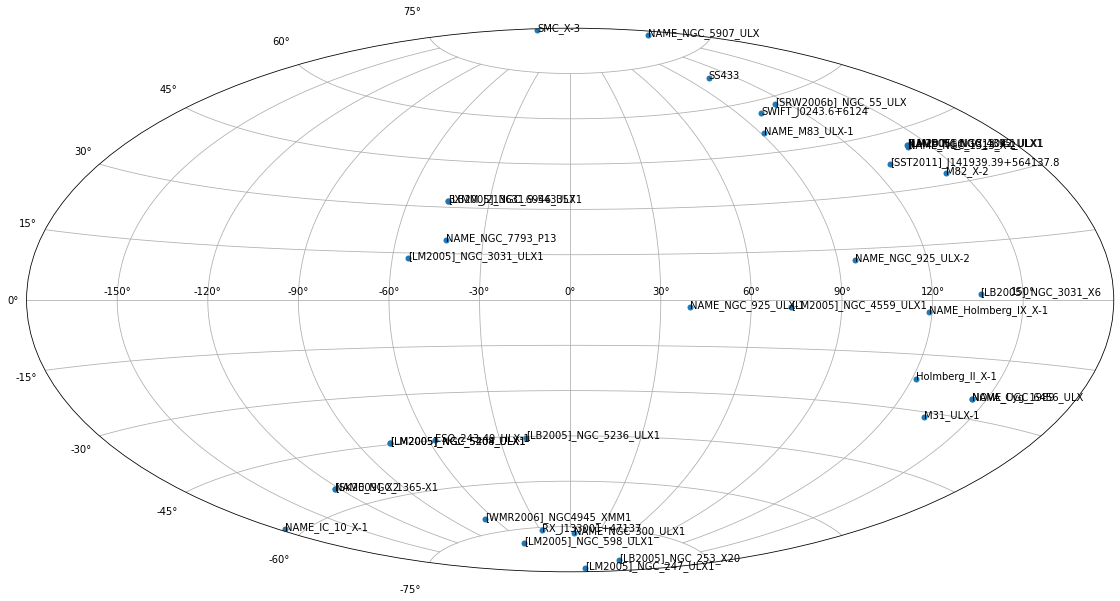

In [71]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np

ra_random = np.random.rand(100)*360.0 * u.degree
dec_random = (np.random.rand(100)*180.0-90.0) * u.degree




c = SkyCoord(sub['RA'], sub['DEC'], unit=(u.hourangle, u.deg), frame='icrs')
c = c.galactic
ra_rad = c.l.wrap_at(180 * u.deg).radian
dec_rad = c.b.radian


plt.figure(figsize=(20,10))
plt.subplot(111, projection="aitoff")
plt.grid(True)

plt.plot(ra_rad, dec_rad, '.', markersize=10, alpha=1.0)


for i, txt in enumerate(tab['source_name']):
    plt.annotate(txt, (ra_rad[i], dec_rad[i]))

plt.show()

In [70]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    [(302.86231777, -44.693656  ), (118.98112836,  -3.3530181 ),
     (121.20289706, -21.60334052), (133.61019442, -31.33067912),
     (299.00948074, -79.40501947), (332.44308915, -75.77504486),
     (305.28762357,  13.34772494), (144.28619068,  32.72369941),
     (142.11454873,  40.86954485), (142.15263165,  40.93199775),
     (141.411439  ,  40.56556146), (103.17981336, -87.92093349),
     (113.74286735, -83.58964113), (  4.37121824, -77.1626431 ),
     (141.93344655,  41.07102024), (283.34004943, -44.64598725),
     (283.45753434, -44.56723711), (113.49218841,  58.00433977),
     (127.83122567,  37.32460043), (161.97278768,  81.57855341),
     (314.6004189 ,  31.96672888), (314.65599011,  31.92812729),
     (317.1488451 ,  19.4956838 ), ( 39.69410432,  -2.24459768),
     ( 95.72714833,  11.65878977), (198.8946365 ,  86.45426651),
     (104.83021029,  68.5204343 ), (100.98681911,  56.51508967),
     (144.89956657, -25.16375693), (144.92288996, -25.